In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
#os.environ['PROJ_LIB'] = '/home/lizwy/anaconda3/share/proj'
from mpl_toolkits.basemap import Basemap
from itertools import chain


In [3]:
################
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

Latitude: 50deg 54' 27.2"
Longitude: 135deg 42' 10.6"
Elevation (m): 410848


Text(135, 50, ' Djara')

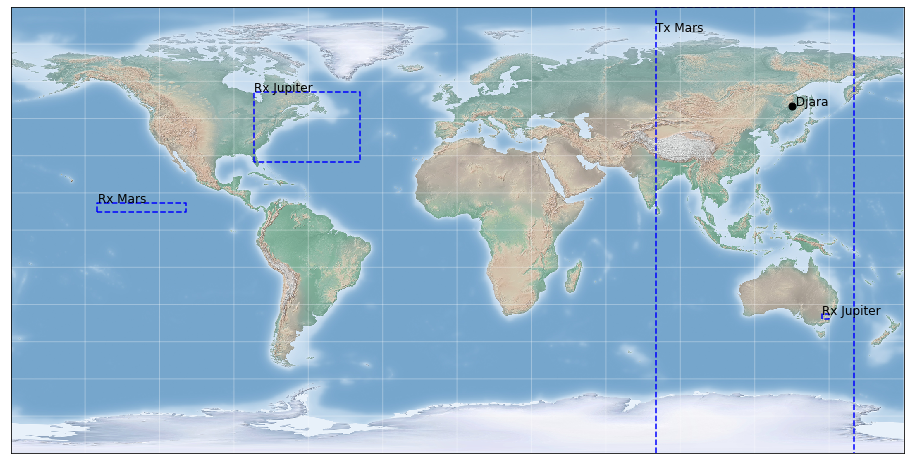

In [6]:
### This calcuates lat, long and elevation at any particular date and time

from skyfield.api import Topos, load, utc
from skyfield.api import EarthSatellite
import time 
import datetime 

ts = load.timescale()

stations_url = 'https://www.celestrak.com/NORAD/elements/active.txt'
satellites = load.tle_file(stations_url)


### Retrieve TLE for particular satellite by name
by_name = {sat.name: sat for sat in satellites}
satellite = by_name['LEMUR-2-DJARA']
#print(satellite.epoch.utc_jpl())
#print (satellite)

fig = plt.figure(figsize=(16, 12), edgecolor='w')

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

# Draw AoIs on world map given BL, TL, TR, BR coordinates

aa,ba = [[80, 80, 160, 160],[-90, 90, 90, -90]] #Create list of AoI lat/long pairs
ab,bb = [[147, 147, 150, 150, 147],[-36, -34, -34, -36, -36]]
ac,bc = [[-145.3, -145.3, -109.5, -109.5, -145.3],[7.3, 11.1, 11.1, 7.3, 7.3]]
ad,bd = [[-82.0, -82.0, -39.3, -39.3, -82.0],[27.6, 55.7, 55.7, 27.6, 27.6]]
plt.plot(aa, ba, '--b')
plt.text(80, 80, 'Tx Mars', fontsize=12)
plt.plot(ab, bb, '--b')
plt.text(147, -34, 'Rx Jupiter', fontsize=12)
plt.plot(ac, bc, '--b')
plt.text(-145, 11.1, 'Rx Mars', fontsize=12)
plt.plot(ad, bd, '--b')
plt.text(-82, 55.7, 'Rx Jupiter', fontsize=12)

tnow=ts.utc(2021, 2, 17, 2, 23, 18)  #### Set the time you're interested in or alternatively ise ts.now() for current position
geocentric = satellite.at(tnow)
subpoint = geocentric.subpoint()
lat = subpoint.latitude
long = subpoint.longitude

print('Latitude:', lat)
print('Longitude:', long)
print('Elevation (m):', int(subpoint.elevation.m))
latnows = int(str(lat)[:-13])
longnows = int(str(long)[:-13])

x, y = m(longnows, latnows)  ### put longitude first, then latitude
plt.plot(x, y, 'ok', markersize=7)
plt.text(x, y, ' Djara', fontsize=12)